In [1]:
%run Preprocessing.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('austin_weather.csv')
X_train, X_test, y_train, y_test, X_val, y_val = preprocess(df)

In [19]:
#build deep learning model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, input_dim=19, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001), metrics=['mse'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2560      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
X_val

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,1.315866,1.257082,1.088110,0.806341,0.655333,0.519738,-0.023841,-0.656740,-0.969241,-0.780175,-0.707234,-0.709273,0.053427,0.581404,0.880402,-0.995928,-0.024482,-1.109896,-0.289438
1,0.853635,0.630728,0.395042,0.806341,0.588455,0.642860,-0.116908,-0.247897,-0.255463,-1.224122,-1.111313,-1.113564,0.053427,0.581404,0.880402,0.229323,-0.024482,-0.073172,-0.289438
2,-0.797189,-1.039551,-1.199016,-0.942192,-0.815986,-0.588366,1.092966,0.242715,-0.374426,1.495056,1.659514,1.774226,0.053427,-0.767834,-1.283252,-1.608553,-1.978713,-1.801045,-0.289438
3,0.127273,0.421943,0.672269,0.879197,0.789089,0.765983,-0.116908,1.142171,1.707428,-0.225240,-0.129979,-0.073960,0.053427,0.581404,0.339488,-1.302240,-0.513040,-0.937109,-0.289438
4,0.721569,0.769918,0.741576,0.733486,0.855967,0.950667,0.441495,0.242715,0.101427,-0.835668,-0.649509,-0.709273,0.053427,0.581404,0.880402,-0.995928,-0.513040,-0.591534,-0.289438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.061240,0.073968,0.117814,1.024908,0.855967,0.581299,0.534563,1.632783,2.004836,-0.891161,-1.053588,-1.113564,0.053427,-2.791691,-1.824165,1.454574,0.952633,0.790764,6.187112
194,0.061240,-0.134817,-0.298027,0.004930,0.053430,0.027247,0.441495,0.406253,0.339353,-0.114254,-0.187704,-0.247227,0.053427,0.581404,0.880402,0.535636,0.952633,0.790764,-0.289438
195,0.259339,0.421943,0.533655,0.296352,0.521577,0.765983,-0.116908,0.324484,0.577279,-0.169747,-0.014528,0.099308,0.053427,0.581404,0.609945,0.229323,0.464076,0.099615,-0.289438
196,-0.334958,0.004373,0.395042,0.150641,0.320942,0.519738,-0.116908,0.733328,1.112613,-0.114254,0.043198,0.099308,0.053427,0.581404,0.069032,0.229323,0.464076,-0.073172,-0.289438


In [21]:
y_val

,Rain,Fog,Thunderstorm
247,0,0,0
172,0,0,0
353,0,0,0
882,0,0,0
1285,0,0,0
...,...,...,...
142,1,1,1
1204,0,0,0
1215,1,0,0
791,0,0,0


Epoch 1/100
29/29 [==============================] - 1s 6ms/step - loss: 0.1317 - mse: 0.1317 - val_loss: 0.1171 - val_mse: 0.1171
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0930 - mse: 0.0930 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.1088 - val_mse: 0.1088
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.1031 - val_mse: 0.1031
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0730 - mse: 0.0730 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0723 - mse: 0.0723 - val_loss: 0.1069 - val_mse: 0.1069
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0663 - mse: 0.0663 - val_loss: 0.1021 - val_mse: 0.1021
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0611 - m

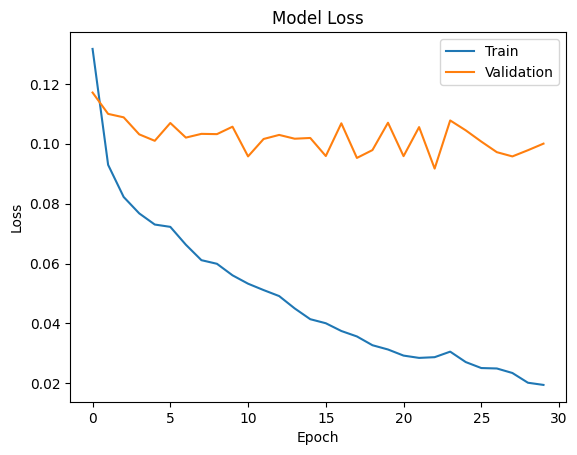

In [22]:
#train model
history = model.fit(X_train, y_train[["Rain"]], epochs=100, batch_size=32, validation_data=(X_val, y_val[["Rain"]]), verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=7)])

#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [25]:
y_train[["Rain"]].value_counts()

Rain
0       653
1       270
dtype: int64

In [26]:
#we have tried to predict the rain column, which is a binary column. We can see that the model is not very good at predicting the rain column because we do not have enough data.